In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# jupyter화면을 출력
%matplotlib inline 

# 한글처리
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font)

In [10]:
# 월별매출데이터.xlsx 데이터 불러오기
# read_excel메서드에 skiprows 매개변수 : skiprows=range(6)
total_df = pd.DataFrame()
for n in range(12):
    df = pd.read_excel('../data/월별매출데이터.xlsx', sheet_name=n, skiprows=range(6)).iloc[:, 1:]
    total_df = pd.concat([total_df,df],ignore_index=True)
    #print(df.head())

In [11]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18229 entries, 0 to 18228
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      18229 non-null  object
 1   지점      18229 non-null  object
 2   품명      18229 non-null  object
 3   수량      18229 non-null  int64 
 4   주문인 ID  18229 non-null  object
 5   수령 주소   18229 non-null  object
 6   주문 상태   18229 non-null  object
 7   결제 수단   18229 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [13]:
# 일자 포맷 변경
# 2018.6.1 -> 2018-6-1
total_df['일자'] = total_df['일자'].str.replace('.','-')

In [14]:
total_df['일자'].head()

0    2018-1-1
1    2018-1-1
2    2018-1-1
3    2018-1-1
4    2018-1-1
Name: 일자, dtype: object

In [15]:
total_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


In [26]:
# 제품별 가격정보.xlsx 불러오기
# 행과 열을 바꾸기
price_df = pd.read_excel('../data/제품별_가격정보.xlsx')
price_df = price_df.T

In [27]:
price_df.iloc[1:,:]

,0
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [28]:
# 첫행 빼고 다시 대입
price_df=price_df.iloc[1:,:]

In [30]:
# replace : 데이터프레임의 메서드
# dict의 key가 있으면 value로 바꿔줌

# price_df를 dict로 변환
price_dict = price_df.to_dict()

In [31]:
price_df

,0
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [32]:
price_dict

{0: {'제품A': 20000,
  '제품B': 5000,
  '제품C': 10000,
  '제품D': 8000,
  '제품E': 30000,
  '제품F': 15000}}

In [34]:
total_df['품명']

0        제품B
1        제품F
2        제품B
3        제품D
4        제품E
        ... 
18224    제품F
18225    제품D
18226    제품D
18227    제품B
18228    제품D
Name: 품명, Length: 18229, dtype: object

In [35]:
total_df['가격'] = total_df['품명'].replace(price_dict[0])

In [36]:
total_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000


In [38]:
# 주문금액 = 가격 * 수량
total_df['주문금액'] = total_df['가격'] * total_df['수량']
total_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,15000
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,120000
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,10000
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,56000
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,270000


In [43]:
# 일자에서 월만 추출
total_df['월'] = total_df['일자'].str.split('-', expand=True)[1].astype(int)

In [44]:
total_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,15000,1
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,120000,1
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,10000,1
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,56000,1
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,270000,1


In [50]:
# 월별 주문금액의 합계
# 결과값을 데이터프레임으로 하려면 as_index = False
groupby_month = total_df.groupby('월', as_index=False)['주문금액'].sum()

In [51]:
# 월별 제품별 주문금액 합계
groupby_monthproduct = total_df.groupby(['월','품명'], as_index=False)['주문금액'].sum()

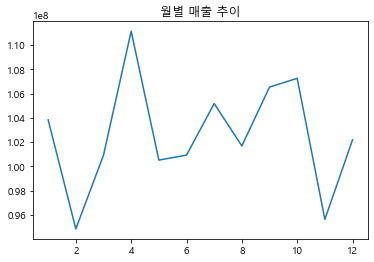

In [53]:
plt.plot(groupby_month['월'], groupby_month['주문금액'])

plt.title('월별 매출 추이')
plt.show()